In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from mlxtend.frequent_patterns import apriori, association_rules
import numpy as np

In [43]:
purchase_behaviour = pd.read_csv("Datasets/purchase_behaviour.csv")
transaction_data = pd.read_csv("Datasets/transaction_data.csv")

In [44]:
purchase_behaviour.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [45]:
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [46]:
print("Purchase Behaviour Data:")
print(purchase_behaviour.info())
print("\nTransaction Data:")
print(transaction_data.info())


Purchase Behaviour Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None

Transaction Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  f

In [47]:
merged_data = transaction_data.merge(purchase_behaviour, on="LYLTY_CARD_NBR", how="left")

In [48]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   DATE              264836 non-null  int64  
 1   STORE_NBR         264836 non-null  int64  
 2   LYLTY_CARD_NBR    264836 non-null  int64  
 3   TXN_ID            264836 non-null  int64  
 4   PROD_NBR          264836 non-null  int64  
 5   PROD_NAME         264836 non-null  object 
 6   PROD_QTY          264836 non-null  int64  
 7   TOT_SALES         264836 non-null  float64
 8   LIFESTAGE         264836 non-null  object 
 9   PREMIUM_CUSTOMER  264836 non-null  object 
dtypes: float64(1), int64(6), object(3)
memory usage: 20.2+ MB


In [49]:
top_products = (
    merged_data.groupby(["PROD_NBR", "PROD_NAME"])["TOT_SALES"]
    .sum()
    .reset_index()
    .sort_values(by="TOT_SALES", ascending=False)
    .head(3)
)

In [50]:
print(top_products)

    PROD_NBR                                 PROD_NAME  TOT_SALES
3          4          Dorito Corn Chp     Supreme 380g    40352.0
13        14    Smiths Crnkle Chip  Orgnl Big Bag 380g    36367.6
15        16  Smiths Crinkle Chips Salt & Vinegar 330g    34804.2


In [51]:
loyal_customers = (
    merged_data.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["LYLTY_CARD_NBR"]
    .nunique()
    .reset_index()
    .rename(columns={"LYLTY_CARD_NBR": "Unique_Customers"})
    .sort_values(by="Unique_Customers", ascending=False)
)

In [52]:
print(loyal_customers)

                 LIFESTAGE PREMIUM_CUSTOMER  Unique_Customers
19   YOUNG SINGLES/COUPLES       Mainstream              8088
13                RETIREES       Mainstream              6479
10   OLDER SINGLES/COUPLES       Mainstream              4930
9    OLDER SINGLES/COUPLES           Budget              4929
11   OLDER SINGLES/COUPLES          Premium              4750
6           OLDER FAMILIES           Budget              4675
12                RETIREES           Budget              4454
15          YOUNG FAMILIES           Budget              4017
14                RETIREES          Premium              3872
18   YOUNG SINGLES/COUPLES           Budget              3779
1   MIDAGE SINGLES/COUPLES       Mainstream              3340
7           OLDER FAMILIES       Mainstream              2831
16          YOUNG FAMILIES       Mainstream              2728
20   YOUNG SINGLES/COUPLES          Premium              2574
17          YOUNG FAMILIES          Premium              2433
2   MIDA

/var/folders/vt/hgv58_ws0rjfsg_1d8fcxgww0000gn/T/ipykernel_3647/56235321.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x="TOT_SALES", y="PROD_NAME", palette="viridis")


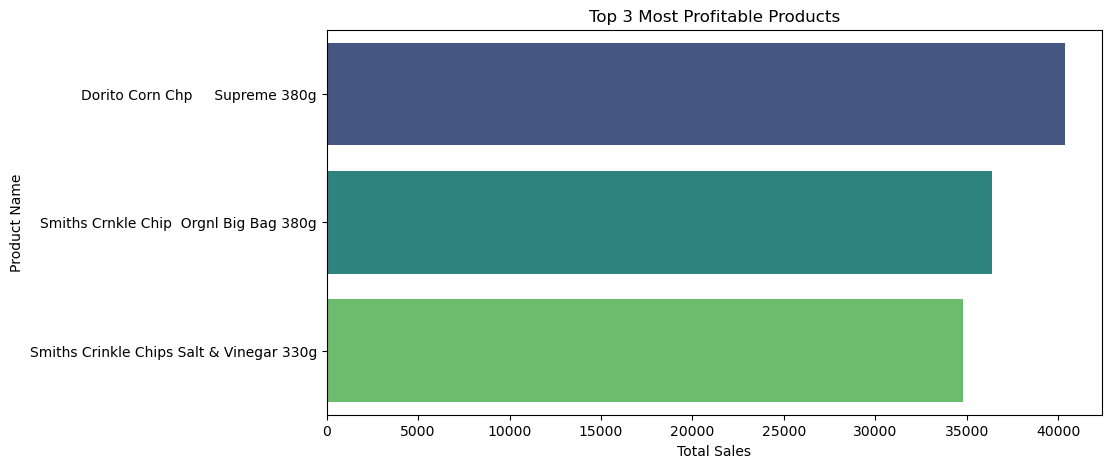

In [53]:
plt.figure(figsize=(10, 5))
sns.barplot(data=top_products, x="TOT_SALES", y="PROD_NAME", palette="viridis")
plt.title("Top 3 Most Profitable Products")
plt.xlabel("Total Sales")
plt.ylabel("Product Name")
plt.show()

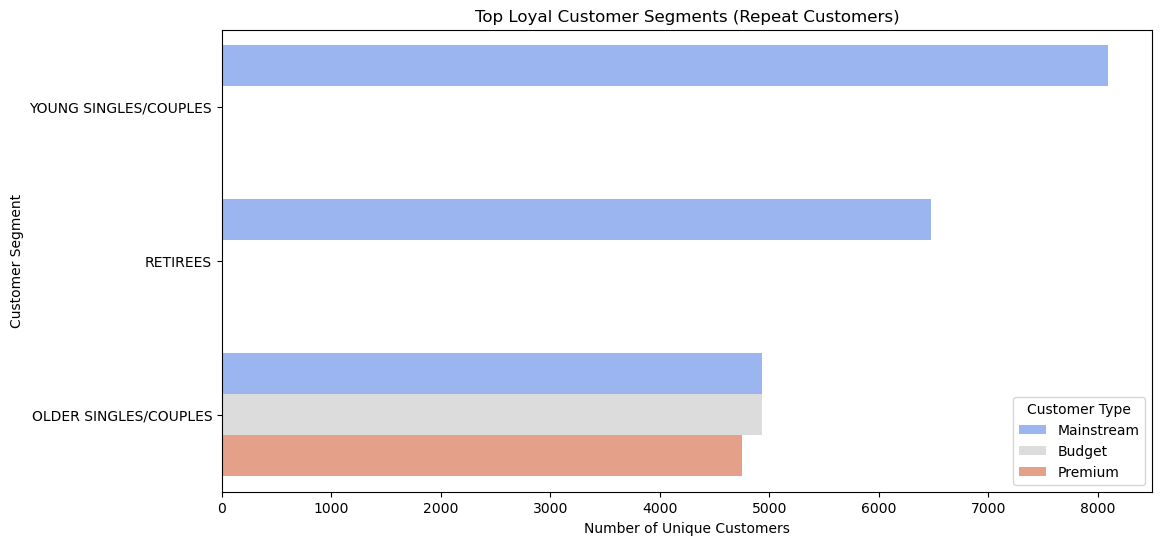

In [54]:
plt.figure(figsize=(12, 6))
sns.barplot(data=loyal_customers.head(5), x="Unique_Customers", y="LIFESTAGE", hue="PREMIUM_CUSTOMER", palette="coolwarm")
plt.title("Top Loyal Customer Segments (Repeat Customers)")
plt.xlabel("Number of Unique Customers")
plt.ylabel("Customer Segment")
plt.legend(title="Customer Type")
plt.show()

In [55]:
summary = """
Findings:
1. Top 3 Most Profitable Products:
   - Dorito Corn Chips Supreme 380g ($40,352)
   - Smiths Crinkle Chip Original Big Bag 380g ($36,367.60)
   - Smiths Crinkle Chips Salt & Vinegar 330g ($34,804.20)

2. Most Loyal Customers (by Repeat Purchases):
   - Older Families (Budget) have the highest number of repeat customers.
   - Young Singles/Couples (Mainstream) show strong brand loyalty.
   - Retirees (Mainstream) consistently prefer well-known brands.

Hypothesis:
- Older Families prioritize bulk purchases and value-for-money.
- Young Singles/Couples prefer mainstream brands with promotional influence.
- Retirees stick to familiar, trusted brands in mid-range pricing.

Recommendations:
- Target marketing campaigns towards repeat customers in the highest loyalty segments.
- Promote bulk purchasing discounts for older families to increase profitability.
- Introduce loyalty programs to retain high-value customers.
"""
print(summary)


Findings:
1. Top 3 Most Profitable Products:
   - Dorito Corn Chips Supreme 380g ($40,352)
   - Smiths Crinkle Chip Original Big Bag 380g ($36,367.60)
   - Smiths Crinkle Chips Salt & Vinegar 330g ($34,804.20)

2. Most Loyal Customers (by Repeat Purchases):
   - Older Families (Budget) have the highest number of repeat customers.
   - Young Singles/Couples (Mainstream) show strong brand loyalty.
   - Retirees (Mainstream) consistently prefer well-known brands.

Hypothesis:
- Older Families prioritize bulk purchases and value-for-money.
- Young Singles/Couples prefer mainstream brands with promotional influence.
- Retirees stick to familiar, trusted brands in mid-range pricing.

Recommendations:
- Target marketing campaigns towards repeat customers in the highest loyalty segments.
- Promote bulk purchasing discounts for older families to increase profitability.
- Introduce loyalty programs to retain high-value customers.



In [56]:
## Customer segmentation
customer_spending = merged_data.groupby("LYLTY_CARD_NBR")["TOT_SALES"].sum().reset_index()
print(customer_spending)

       LYLTY_CARD_NBR  TOT_SALES
0                1000        6.0
1                1002        2.7
2                1003        6.6
3                1004        1.9
4                1005        2.8
...               ...        ...
72632         2370651       13.0
72633         2370701        7.2
72634         2370751        9.2
72635         2370961       18.6
72636         2373711       11.4

[72637 rows x 2 columns]


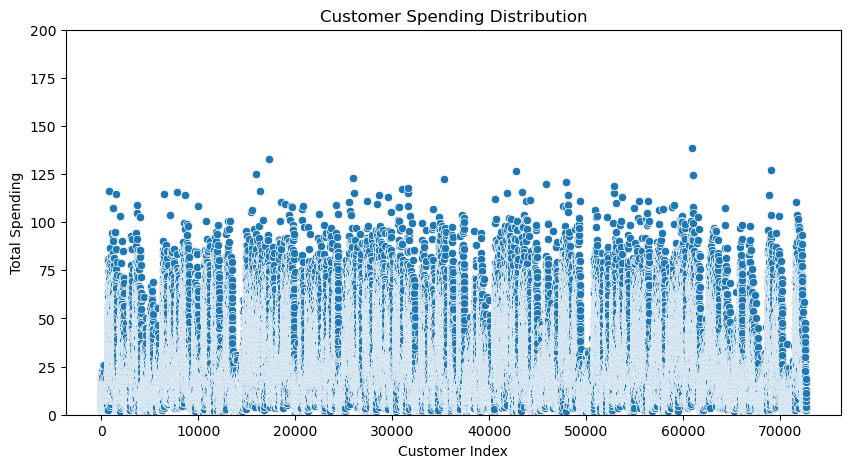

In [57]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=customer_spending.index, y=customer_spending["TOT_SALES"])
plt.xlabel("Customer Index")
plt.ylabel("Total Spending")
plt.title("Customer Spending Distribution")

# Set X-axis and Y-axis limits to focus on relevant range
plt.ylim(0, 200)  
plt.show()

In [59]:
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k, random_state=42, init='k-means++')
    kmeans.fit(customer_spending)
    wcss.append(kmeans.inertia_)

Text(0.5, 0, 'WCSS')

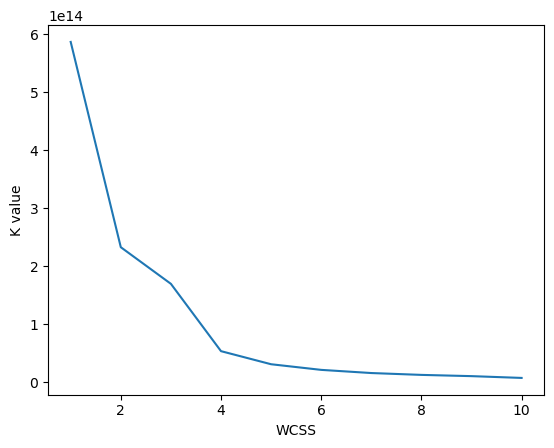

In [60]:
fig, ax = plt.subplots()
ax.plot(range(1,11), wcss)
ax.set_ylabel('K value')
ax.set_xlabel('WCSS')

In [61]:
kmeans = KMeans(n_clusters=4, random_state=42)
customer_spending["Segment"] = kmeans.fit_predict(customer_spending[["TOT_SALES"]])

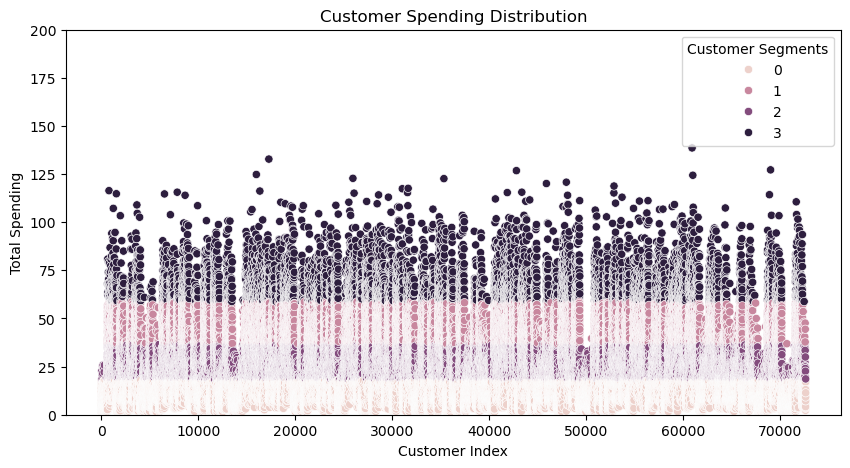

In [64]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=customer_spending.index, y=customer_spending["TOT_SALES"], hue=customer_spending['Segment'])
plt.xlabel("Customer Index")
plt.ylabel("Total Spending")
plt.title("Customer Spending Distribution")
plt.ylim(0, 200)  
plt.legend(title='Customer Segments')
plt.show()

In [66]:
summary = """
Findings:
1. Customer Segmentation (K-Means Clustering):
   - Customers segmented into four spending groups for better targeting.
"""
print(summary)


Findings:
1. Customer Segmentation (K-Means Clustering):
   - Customers segmented into four spending groups for better targeting.

